Goal: examine all 1kP algal sequences to see if these contain only an M Domain or also IKC domains.

In [2]:
inseq=MIKC_orthogroup

In [2]:
grep '^>' data/$inseq.fasta  | grep -F -f ./data/1kP_algae_IDs.txt  | sort | uniq > ./data/"$inseq"_selection-algae.txt

In [5]:
wc -l ./data/"$inseq"_selection-algae.txt
head ./data/"$inseq"_selection-algae.txt

125 ./data/MIKC_orthogroup_selection-algae.txt
>ACRY-2040985-Pteromonas_sp.
>AJAU-2006740-Helicodictyon_planctonicum
>AJUW-2052652-Chloromonas_rosa
>AKCR-2016810-Parachlorella_kessleri
>ALZF-2019222-Halochlorococcum_marinum
>AZZW-2004234-Chlorokybus_atmophyticus
>BAJW-2009533-Isochrysis_sp.
>BAJW-2010911-Isochrysis_sp.
>BAJW-2033085-Isochrysis_sp.
>BAJW-2043867-Isochrysis_sp.


In [6]:
grep --no-group-separator -A 1 -F -f ./data/"$inseq"_selection-algae.txt data/"$inseq"_linear.fasta > data/"$inseq"_selection-algae.fasta

In [8]:
head data/"$inseq"_selection-algae.fasta

>QXSZ-2000951-Mantoniella_squamata
NAQVTFTKRKNGLMKKAMELSVLCDCQIALVIFNSNNKLFQYSSGDIKAVLERFKNDTLGPHEKRNNKDL
>IRZA-2060948-Proteomonas_sulcata
MGRKKIKIARINDERSRHATFAKRKNGLVKKAIELSILCDCEIALVIFNSQGKLTQYASGNIDQTLSKF
>MXDS-2024758-Spermatozopsis_exsultans
RVKIERIADEKLRQATFARRKNGLMRRAMELSVLCDCNVALIIFDASGRLAQYSSADMEALLEQYSRACAEPHERRTNDDLFKHQF
>VBLH-2005464-Cladophora_glomerata
MGRNKIKIQRIKDTRSRVTFTKRKNGLYKKLMELSVLCNAIGLVLFNENGKLFQYCSNGDMEDLLRKYNECNGKIHENR
>AZZW-2004234-Chlorokybus_atmophyticus
MGRAKIEIRRIEHATSRQVTFSKRRSGLLKKAYELSVLCDADIAVIMFSPTGKLFEYANSSIEDILERYRNTPKEYRDKRKFDNTDYLAKESKKLRHDLEQAKRELKYMHGEGLDGLSMQELEKVESKLEEGLRKLRTCKSNLMQQEIDRLRRQ


Ok so that's all my algal sequences from the 1kP MADS orhtogroup. Now let's add some guide sequences in which I can recognize the domains.

In [3]:
grep -c '>' data/Zhang-2019-fig4_MIKC_Azfi-gymnosperms_selection-v3.faa

76


In [4]:
cat data/outgroup_algae.fasta data/Zhang-2019-fig4_MIKC_Azfi-gymnosperms_selection-v3.faa data/"$inseq"_selection-algae.fasta > data/"$inseq"_selection-algae_guidev3.fasta

In [5]:
conda activate phylogenetics

(phylogenetics) 

: 1

In [6]:
ginsi --help

------------------------------------------------------------------------------
  MAFFT v7.458 (2020/Mar/27)
  https://mafft.cbrc.jp/alignment/software/
  MBE 30:772-780 (2013), NAR 30:3059-3066 (2002)
------------------------------------------------------------------------------
High speed:
  % mafft in > out
  % mafft --retree 1 in > out (fast)

High accuracy (for <~200 sequences x <~2,000 aa/nt):
  % mafft --maxiterate 1000 --localpair  in > out (% linsi in > out is also ok)
  % mafft --maxiterate 1000 --genafpair  in > out (% einsi in > out)
  % mafft --maxiterate 1000 --globalpair in > out (% ginsi in > out)

If unsure which option to use:
  % mafft --auto in > out

--op # :         Gap opening penalty, default: 1.53
--ep # :         Offset (works like gap extension penalty), default: 0.0
--maxiterate # : Maximum number of iterative refinement, default: 0
--clustalout :   Output: clustal format, default: fasta
--reorder :      Outorder: aligned, default: input order
--quiet :      

: 1

In [7]:
linsi --thread 8 data/"$inseq"_selection-algae_guidev3.fasta > data/alignments_raw/"$inseq"_selection-algae_guidev3_aligned-mafft-linsi.fasta

outputhat23=16
treein = 0
compacttree = 0
stacksize: 8192 kb
rescale = 1
All-to-all alignment.
tbfast-pair (aa) Version 7.458
alg=L, model=BLOSUM62, 2.00, -0.10, +0.10, noshift, amax=0.0
8 thread(s)

outputhat23=16
Loading 'hat3.seed' ... 
done.
Writing hat3 for iterative refinement
rescale = 1
Gap Penalty = -1.53, +0.00, +0.00
tbutree = 1, compacttree = 0
Constructing a UPGMA tree ... 
  200 / 203
done.

Progressive alignment ... 
STEP   181 /202 (thread    7) 
Reallocating (by thread 4) ..done. *alloclen = 2463
STEP   202 /202 (thread    2) 
done.
tbfast (aa) Version 7.458
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
8 thread(s)

minimumweight = 0.000010
autosubalignment = 0.000000
nthread = 8
randomseed = 0
blosum 62 / kimura 200
poffset = 0
niter = 16
sueff_global = 0.100000
nadd = 16
Loading 'hat3' ... done.
rescale = 1

  200 / 203
Segment   1/  1    1-1271
003-0402-0 (thread    6) better        
Converged2.
done
dvtditr (aa) Version 7.458
alg=A, model=BLOSUM62, 1

: 1

In [9]:
ginsi --thread 8 data/"$inseq"_selection-algae_guidev3.fasta > data/alignments_raw/"$inseq"_selection-algae_guidev3_aligned-mafft-ginsi.fasta

outputhat23=16
treein = 0
compacttree = 0
stacksize: 8192 kb
rescale = 1
All-to-all alignment.
tbfast-pair (aa) Version 7.458
alg=A, model=BLOSUM62, 2.00, -0.10, +0.10, noshift, amax=0.0
8 thread(s)

outputhat23=16
Loading 'hat3.seed' ... 
done.
Writing hat3 for iterative refinement
rescale = 1
Gap Penalty = -1.53, +0.00, +0.00
tbutree = 1, compacttree = 0
Constructing a UPGMA tree ... 
  200 / 203
done.

Progressive alignment ... 
STEP   180 /202 (thread    3) 
Reallocating (by thread 2) ..done. *alloclen = 2547
STEP   202 /202 (thread    7) 
done.
tbfast (aa) Version 7.458
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
8 thread(s)

minimumweight = 0.000010
autosubalignment = 0.000000
nthread = 8
randomseed = 0
blosum 62 / kimura 200
poffset = 0
niter = 16
sueff_global = 0.100000
nadd = 16
Loading 'hat3' ... done.
rescale = 1

  200 / 203
Segment   1/  1    1-1266
003-0402-0 (thread    1) worse         
Converged2.
done
dvtditr (aa) Version 7.458
alg=A, model=BLOSUM62, 1

: 1

In [10]:
linsi --dash --thread 8 data/"$inseq"_selection-algae_guidev3.fasta > data/alignments_raw/"$inseq"_selection-algae_guidev3_aligned-mafft-linsi-dash.fasta

Calling DASH (https://sysimm.org/dash/)
------------------
MAFFT-DASH Client v 1.1
------------------
Querying from https://sysimm.org/dash/REST1.0/
Building query for template selection.
Sending query for template selection...
Waiting for response from server...
Querying DASH for domains - [0%]
Querying DASH for domains - [100%]
Querying DASH for sequences - [0%]
Querying DASH for sequences - [100%]
Combining domain alignments - [0%]
Combining domain alignments - [100%]
Filtering structural restraint(hat3) file...
Combining original sequences with DASH sequences...
------------------
Ready to run MAFFT:
  mafft --seedtable hat3.seed --localpair --maxiterate 100 dashsequences
Done.
# of structures = 
216
outputhat23=3
treein = 0
compacttree = 0
stacksize: 8192 kb
rescale = 1
All-to-all alignment.
tbfast-pair (aa) Version 7.458
alg=A, model=BLOSUM62, 2.00, -0.10, +0.10, noshift, amax=0.0
8 thread(s)

outputhat23=3
Loading 'hat3.seed' ... 
done.
Writing hat3 for iterative refinement
resc

: 1

In [11]:
ls data/alignments_raw/MIKC_orthogroup_selection-algae_guidev3*

data/alignments_raw/MIKC_orthogroup_selection-algae_guidev3_aligned-mafft-ginsi.fasta
data/alignments_raw/MIKC_orthogroup_selection-algae_guidev3_aligned-mafft-linsi-dash.fasta
data/alignments_raw/MIKC_orthogroup_selection-algae_guidev3_aligned-mafft-linsi.fasta
(phylogenetics) 

: 1

In [12]:
inseq="$inseq"_selection-algae_guidev3

(phylogenetics) 

: 1

In [30]:
trimal -h


trimAl v1.4.rev15 build[2013-12-17]. 2009-2013. Salvador Capella-Gutierrez and Toni Gabaldón.

trimAl webpage: http://trimal.cgenomics.org

This program is free software: you can redistribute it and/or modify 
it under the terms of the GNU General Public License as published by 
the Free Software Foundation, the last available version.

Please cite:
		trimAl: a tool for automated alignment trimming in large-scale phylogenetic analyses.
		Salvador Capella-Gutierrez; Jose M. Silla-Martinez; Toni Gabaldon.
		Bioinformatics 2009, 25:1972-1973.

Basic usage
	trimal -in <inputfile> -out <outputfile> -(other options).

Common options (for a complete list please see the User Guide or visit http://trimal.cgenomics.org):

    -h                       Print this information and show some examples.
    --version                Print the trimAl version.

    -in <inputfile>          Input file in several formats (clustal, fasta, NBRF/PIR, nexus, phylip3.2, phylip).

    -compareset <inputfile>  In


9) Selection of sequences to be deleted from the alignment. Start in 0

   trimal -in <inputfile> -out <outputfile> -selectseqs { 2,4,8-12 } 

10) Select the 5 most representative sequences from the alignment

   trimal -in <inputfile> -out <outputfile> -clusters 5 

(phylogenetics) 

: 1

In [13]:
if    [ ! -d data/alignments_trimmed ]
then  mkdir  data/alignments_trimmed 
fi

# define appendix only once here:
trimappendix='trim-gt1-res9-seq6'


for a in "data/alignments_raw/$inseq"_aligned*.fasta
do  appendix=$(echo $a | cut -d '/' -f 3- | sed "s/$inseq\_//" | sed "s/.fasta//")
    if    [ ! -f data/alignments_trimmed/"$inseq"_"$appendix"_"$trimappendix".fasta ]
    then  echo "trimming alignment $a"
          sed -i 's/ /_/g' $a
          trimal -in $a   \
                 -out data/alignments_trimmed/"$inseq"_"$appendix"_"$trimappendix".fasta \
                 -gt .1 \
                 -resoverlap .9 \
                 -seqoverlap 60 \
                 -htmlout data/alignments_trimmed/"$inseq"_"$appendix"_"$trimappendix".html
    fi
done

(phylogenetics) (phylogenetics) (phylogenetics) (phylogenetics) (phylogenetics) (phylogenetics) trimming alignment data/alignments_raw/MIKC_orthogroup_selection-algae_guidev3_aligned-mafft-ginsi.fasta




trimming alignment data/alignments_raw/MIKC_orthogroup_selection-algae_guidev3_aligned-mafft-linsi-dash.fasta


trimming alignment data/alignments_raw/MIKC_orthogroup_selection-algae_guidev3_aligned-mafft-linsi.fasta




(phylogenetics) 

: 1

Now I have the alignement shown here: I took out some extra seqeuences still to keep it of managable size. I can continue with this.

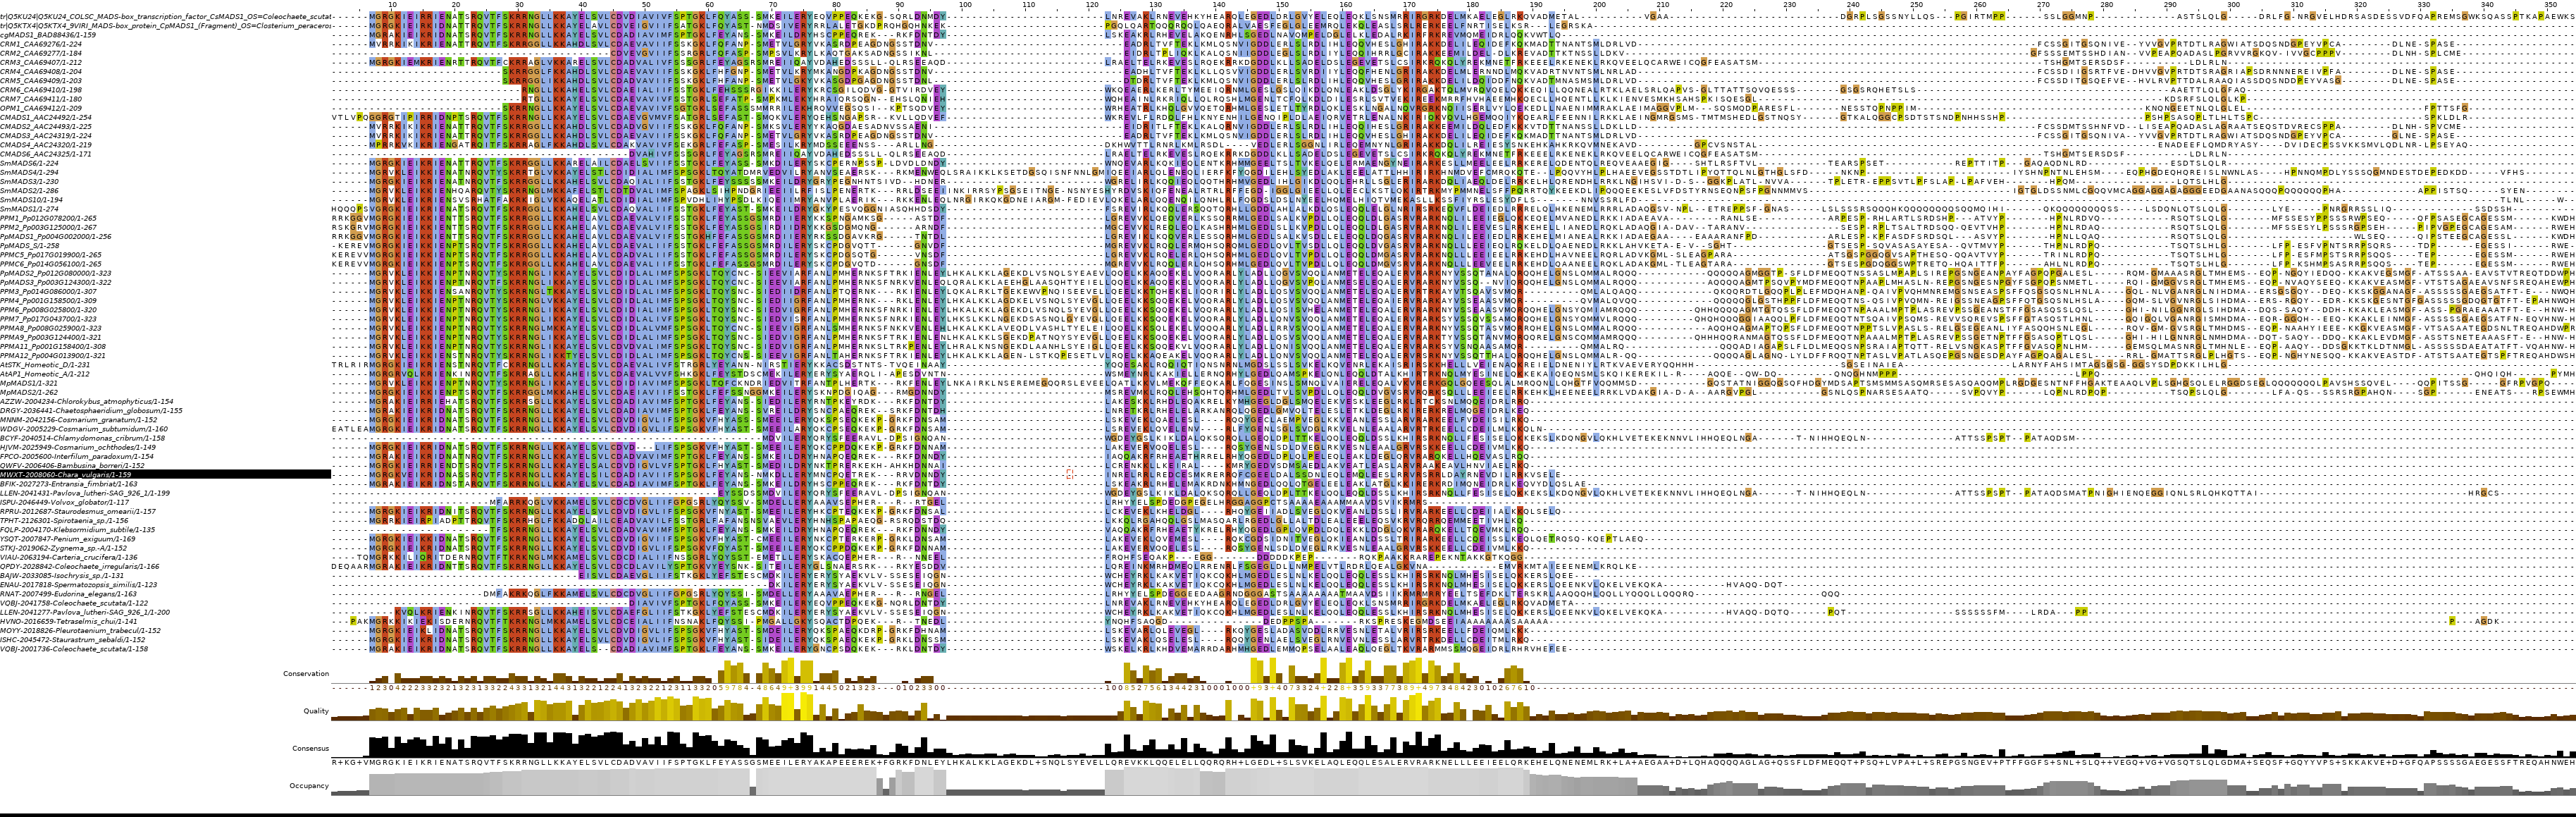